In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection
    
    
# con = PostgresConnection().getConnection()    

### Common Function to fetch Data from all tables 

In [3]:
#  select_stmt= is the SQL select query along with  table and column name    
def retrive_data_from_table(select_stmt): 
    con = PostgresConnection().getConnection()
    cur = con.cursor()
#     select_stmt = "SELECT t.payment_key , t.trans_type, t.bank_name " \
#                   "FROM ecomdb_star_schema.trans_dim t"
    cur.execute(select_stmt)
    records = cur.fetchall()
    return records

### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

#### S1-> item1 -> quantity_sales
#### S1-> item2 -> quantity_sales
#### S1-> item3 -> quantity_sales

In [77]:
select_query =  "select st.store_key, it.item_name, sum(fact.quantity) "\
                "from ecomdb_star_schema.fact_table fact "\
                "join ecomdb_star_schema.store_dim st on st.store_key = fact.store_key "\
                "join ecomdb_star_schema.item_dim it on it.item_key = fact.item_key "\
                "group by(st.store_key, it.item_key) "\
                "order by st.store_key, sum(fact.quantity) desc"

record_Q6 = retrive_data_from_table(select_query)
df_Q6 = pd.DataFrame(list(record_Q6), columns=['Store', 'Item', 'Total Quantity'])
df_Q6 = df_Q6.dropna()
df_Q6['Total Quantity'] = df_Q6['Total Quantity'].astype('int64')
df_Q6 = df_Q6.groupby('Store').head(4)
df_Q6

successfully connected to database


,Store,Item,Total Quantity
0,S0001,Hefty Supreme Foam Plates 6 inch,78
1,S0001,Muscle Milk Protein Shake Van. 11oz,71
2,S0001,Waterloo Sparkling Lime 12oz,70
3,S0001,Njoy Sugar Canister 22 oz,69
262,S0002,Planters Nut-trition 1.5 oz,83
...,...,...,...
190178,S0098,Ozarka Spring Water Mini 8oz,65
190439,S0099,Coffee-mate Original Powdered Creamer,86
190440,S0099,Keebler Cookie & Cracker Variety,82
190441,S0099,Nature Valley Sweet/Salty Almond Bars,80


<AxesSubplot:ylabel='Store/Item'>

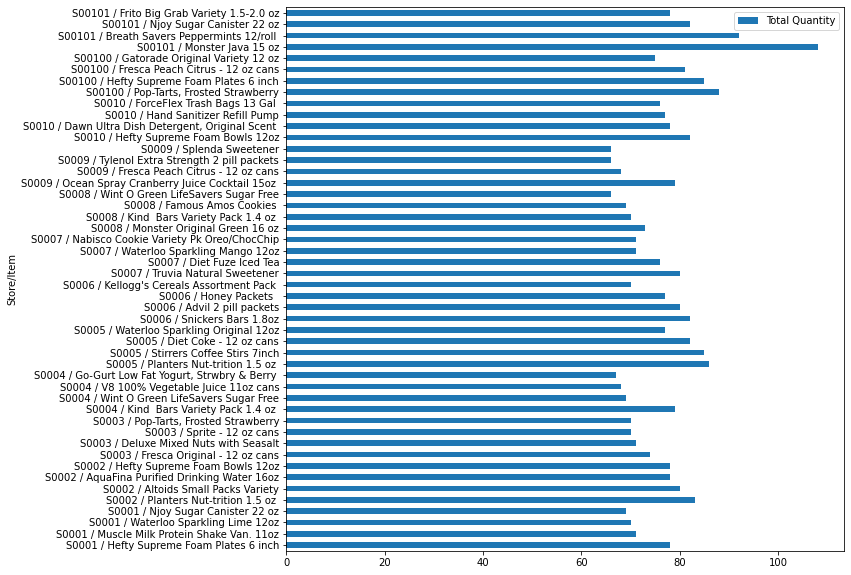

In [80]:
df_Q6 = df_Q6.head(48)
df_Q6['Store/Item'] = df_Q6['Store'] + ' / ' + df_Q6['Item']
df_Q6.plot.barh(x='Store/Item', y='Total Quantity', figsize=(10,10), rot=0)

#### Using Another function

In [70]:
# ------------------------------------------------
#  Using 'nlargest(4)' instead of 'head(4)'
#------------------------------------------------

select_query =  "select st.store_key, it.item_name, sum(fact.quantity) "\
                "from ecomdb_star_schema.fact_table fact "\
                "join ecomdb_star_schema.store_dim st on st.store_key = fact.store_key "\
                "join ecomdb_star_schema.item_dim it on it.item_key = fact.item_key "\
                "group by(st.store_key, it.item_key) "\
                "order by st.store_key, sum(fact.quantity) desc"

record_Q6 = retrive_data_from_table(select_query)
df_Q6 = pd.DataFrame(list(record_Q6), columns=['Store', 'Item', 'Total Quantity'])
df_Q6 = df_Q6.dropna()
df_Q6['Total Quantity'] = df_Q6['Total Quantity'].astype('int64')



successfully connected to database


,Store,Item,Total Quantity
0,S0001,Hefty Supreme Foam Plates 6 inch,78
1,S0001,Muscle Milk Protein Shake Van. 11oz,71
2,S0001,Waterloo Sparkling Lime 12oz,70
3,S0001,Njoy Sugar Canister 22 oz,69
4,S0001,Vita Coconut Water 10oz,68
...,...,...,...
190698,S0099,V-8 Splash Variety 20 oz,5
190699,S0099,Fuze Iced Tea,4
190700,S0099,Paper Plates 8.5 inch Ultra Strong,4
190701,S0099,Pringles Snak Stacks Variety,3


In [75]:
df_Q6 = df_Q6.groupby('Store')['Total Quantity'].nlargest(4).reset_index()
df_Q6

,Store,level_1,Total Quantity
0,S0001,0,78
1,S0001,1,71
2,S0001,2,70
3,S0001,3,69
4,S0002,262,83
...,...,...,...
2899,S0098,190178,65
2900,S0099,190439,86
2901,S0099,190440,82
2902,S0099,190441,80


In [68]:
df_Q6.columns
df_Q6.dtypes

Store             object
level_1            int64
Total Quantity     int64
dtype: object

<AxesSubplot:ylabel='Store'>

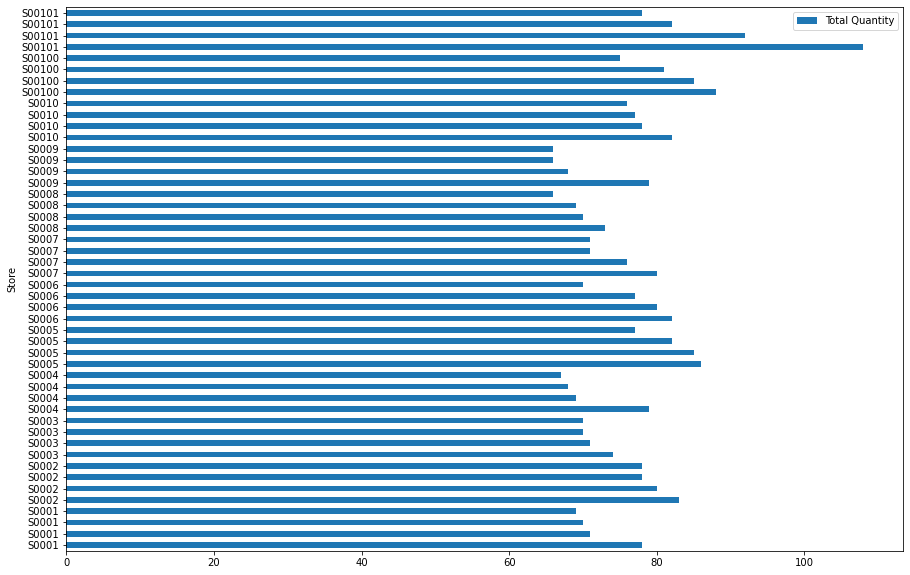

In [69]:
df_Q6 = df_Q6.head(48)
# df_Q6['Store/Item'] = df_Q6['Store'] + ' / ' + df_Q6['Item']
df_Q6.plot.barh(x='Store', y='Total Quantity', figsize=(15,10), rot=0)